# Initial Exploration
This notebook shows the initial exploration I did of the data before deciding how to proceed. <br>
Data has been obtained from: https://www.kaggle.com/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv("../data/customer_data.csv")

In [3]:
display(df.head())
display(df.info())
display(df.describe().T)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

None

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


All caps titles are going to be annoying so let's change that

In [4]:
df.columns = map(str.lower, df.columns)

Any duplicate data?

In [5]:
# Check for duplicates
print(df.duplicated().sum())

0


Any missing data?

In [6]:
df.isnull().sum().apply(lambda x: 100*(x/len(df)))

cust_id                             0.000000
balance                             0.000000
balance_frequency                   0.000000
purchases                           0.000000
oneoff_purchases                    0.000000
installments_purchases              0.000000
cash_advance                        0.000000
purchases_frequency                 0.000000
oneoff_purchases_frequency          0.000000
purchases_installments_frequency    0.000000
cash_advance_frequency              0.000000
cash_advance_trx                    0.000000
purchases_trx                       0.000000
credit_limit                        0.011173
payments                            0.000000
minimum_payments                    3.497207
prc_full_payment                    0.000000
tenure                              0.000000
dtype: float64

Very small amount in credit_limit, few more in minimum payments so let's investigate what is going on here

In [7]:
df[df['credit_limit'].isnull()]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


This is one person so let's just drop them.

In [8]:
df = df[df['credit_limit'].notna()]

In [9]:
df[df['minimum_payments'].isnull()]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


What does minimum payments actually mean? <br>
Can we recover any of this information? Use regression somehow?

<AxesSubplot: >

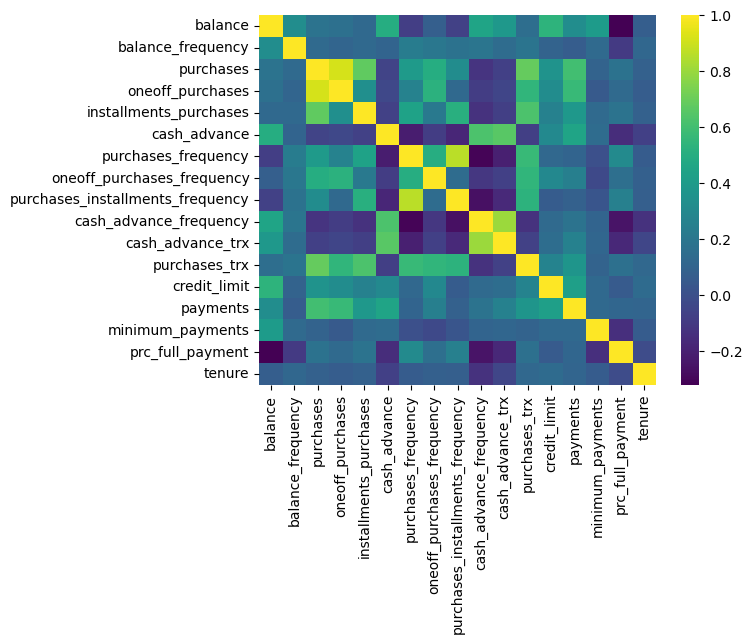

In [10]:
sns.heatmap(df.corr(), cmap='viridis')

<AxesSubplot: >

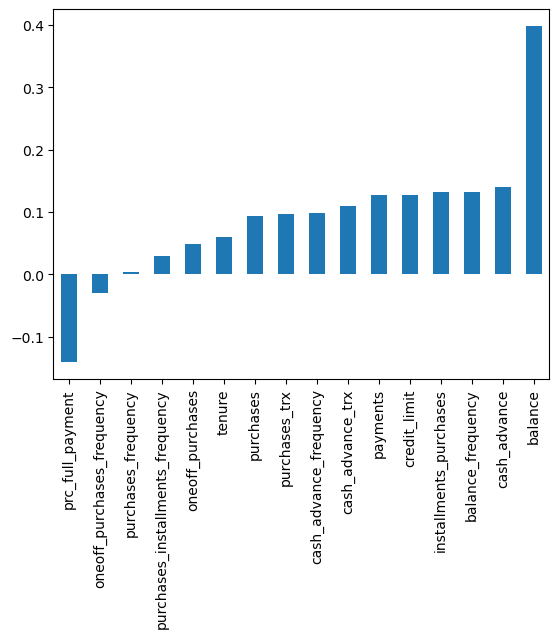

In [11]:
df.corr()['minimum_payments'].sort_values()[:-1].plot(kind='bar')

minimum_payments is most correlated with balance although the majority of columns are still providing some correlation

What is a normal sort of value for minimum payments? Do we currently have any suspected outliers?

In [12]:
df['minimum_payments'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: minimum_payments, dtype: float64

<AxesSubplot: xlabel='minimum_payments', ylabel='Count'>

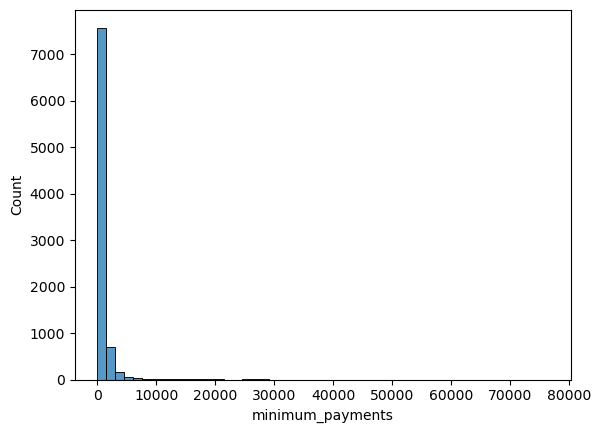

In [13]:
sns.histplot(df, x='minimum_payments', bins=50)

How many values are actually above 1000? (75% is 825...)

In [14]:
subset = df[df['minimum_payments'] > 1000]
display(subset)

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
1,C10002,3202.467416,0.909091,0.00,0.0,0.00,6442.945483,0.000000,0.0,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
5,C10006,1809.828751,1.000000,1333.28,0.0,1333.28,0.000000,0.666667,0.0,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
10,C10011,1293.124939,1.000000,920.12,0.0,920.12,0.000000,1.000000,0.0,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12
15,C10016,6886.213231,1.000000,1611.70,0.0,1611.70,2301.491267,0.500000,0.0,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12
19,C10020,3577.970933,1.000000,398.64,0.0,398.64,0.000000,1.000000,0.0,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,C19053,3335.053583,0.700000,0.00,0.0,0.00,5823.467109,0.000000,0.0,0.000000,0.300000,3,0,7000.0,931.371718,1006.983314,0.000000,10
8840,C19081,2588.410789,0.888889,787.40,0.0,787.40,3762.650329,0.777778,0.0,0.666667,0.555556,10,17,3000.0,1739.406636,1769.001229,0.000000,9
8873,C19114,1023.883008,1.000000,585.84,0.0,585.84,956.849209,1.000000,0.0,0.875000,0.125000,2,22,1000.0,212.105443,2789.590897,0.000000,8
8881,C19122,2150.940844,1.000000,1105.74,0.0,1105.74,2220.336732,1.000000,0.0,0.857143,0.142857,7,13,2500.0,631.429223,2825.419309,0.000000,7


<AxesSubplot: xlabel='minimum_payments', ylabel='Count'>

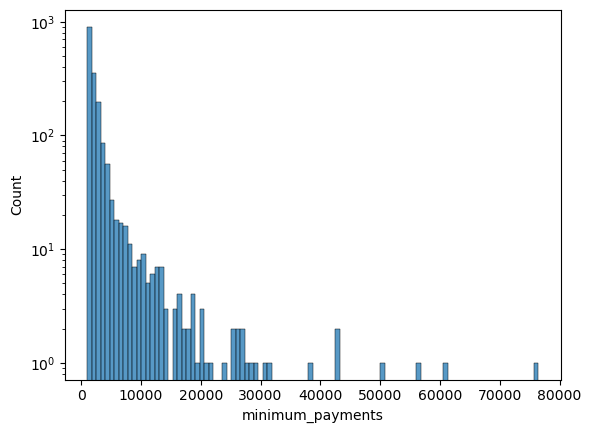

In [15]:
sns.histplot(subset, x='minimum_payments', log_scale=(False, True), bins=100)

Let's try use z-score to identify anomalies outside of 3 sigma

In [16]:
z = np.abs(stats.zscore(df['minimum_payments'], nan_policy='omit'))
outliers = df[z > 3]
print("Outlier value at 3 sigma = ", df['minimum_payments'].mean() + 3*df['minimum_payments'].std())
print("Outlier value at 5 sigma = ", df['minimum_payments'].mean() + 5*df['minimum_payments'].std())
display(outliers['minimum_payments'].describe())

Outlier value at 3 sigma =  7982.0039937073225
Outlier value at 5 sigma =  12727.1366942238


count      100.000000
mean     17334.556950
std      11823.374437
min       8096.795020
25%      10427.206920
50%      13096.382430
75%      19156.264442
max      76406.207520
Name: minimum_payments, dtype: float64

<AxesSubplot: xlabel='minimum_payments', ylabel='Count'>

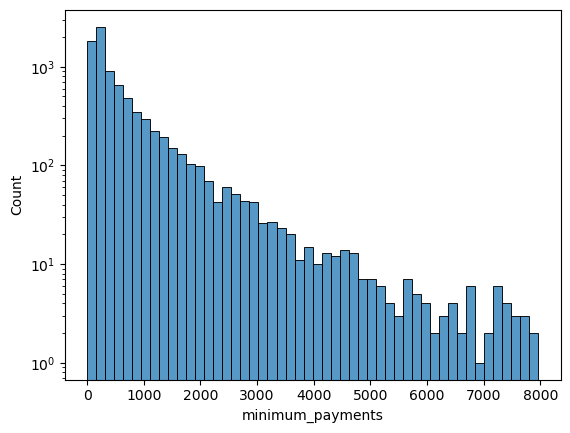

In [17]:
sns.histplot(df[z < 3], x='minimum_payments', log_scale=(False,True), bins=50)

I mean honestly my judgement on this is that I can't say for certain that any of these are actually outliers as they seem to be part of the distributions tail.

<AxesSubplot: xlabel='minimum_payments', ylabel='Count'>

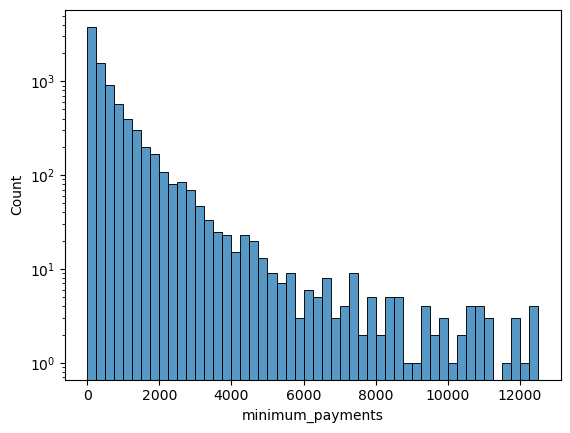

In [18]:
sns.histplot(df[z < 5], x='minimum_payments', log_scale=(False,True), bins=50)

<AxesSubplot: xlabel='minimum_payments', ylabel='Count'>

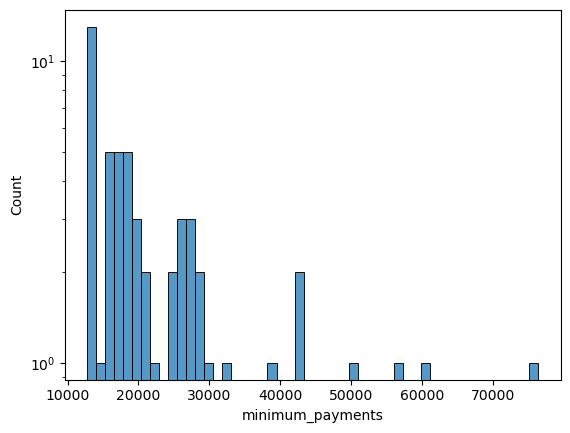

In [19]:
sns.histplot(df[z > 5], x='minimum_payments', log_scale=(False,True), bins=50)

Let's use 5 sigma as our boundary condition as this seems somewhat reasonable for describing outliers

In [20]:
cutoff = df['minimum_payments'].mean() + 5*df['minimum_payments'].std()
df['minimum_payments'] = df['minimum_payments'].apply(lambda mp: np.nan if mp > cutoff else mp)

Now need to fill in these nan values. Let's use IterativeImputer

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

IterativeImputer only works on numerical data so need to drop cust_id, this is just an identifier so is going to be irrelevant for our future clustering algorithm so happy to drop this now.

In [22]:
df.drop('cust_id', axis=1, inplace=True)

In [23]:
impute_it = IterativeImputer()
imputed = impute_it.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [24]:
df.isnull().sum().apply(lambda x: 100*(x/len(df)))

balance                             0.0
balance_frequency                   0.0
purchases                           0.0
oneoff_purchases                    0.0
installments_purchases              0.0
cash_advance                        0.0
purchases_frequency                 0.0
oneoff_purchases_frequency          0.0
purchases_installments_frequency    0.0
cash_advance_frequency              0.0
cash_advance_trx                    0.0
purchases_trx                       0.0
credit_limit                        0.0
payments                            0.0
minimum_payments                    0.0
prc_full_payment                    0.0
tenure                              0.0
dtype: float64

# Findings
We found the column titles were all capitalised and these were changed to lowercase for ease of coding.

In this notebook we found minimal missing data. 
- Dropped one person who was missing their credit_limit 
- Filled in missing data for people with missing/outlier minimum_payments value using the IterativeImputer.